# HW5: Image classification with Convolutional Neural Networks (20 points)

For this assignment, you'll build simple convolutional neural networks using Keras for image classification tasks. The goal is to get you familiar with the steps of working with deep learning models, namely, preprocessing dataset, defining models, train/test models and quantatively comparing performances.
Make sure this notebook is launched in an environment with Numpy, Tensorflow, matplotlib and Keras installed. Refer
to: https://www.tutorialspoint.com/keras/keras_installation.htm if you need help with creating a virtual environment with all required dependencies. 

Furthermore, you can refer to the official Keras website for detailed documentations about different neural network layers (https://keras.io/api/layers/) and other classes.

In [19]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.optimizers import SGD
import numpy as np
import tensorflow as tf

## (1) Sample code (5 points)

As in class, we first download the MNIST dataset and get the train/test sets. We then process the data to be ready for training and testing.

In [4]:
# loading the dataset
(trainX, trainY), (testX, testY) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [5]:
def process_dataset(trainX, trainY, testX, testY):
    # reshape features and normalize
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    trainX = trainX.astype('float32')
    testX = testX.astype('float32')
    trainX = trainX / 255.0
    testX = testX / 255.0
    # converting labels to one-hot encoding
    trainY = np_utils.to_categorical(trainY)
    testY = np_utils.to_categorical(testY)
    return trainX, trainY, testX, testY
trainX, trainY, testX, testY = process_dataset(trainX, trainY, testX, testY)

We then define the model. Similar to in-class demo, this model has 1 convolution layer with 32 filters, followed by one 
 2-by-2 MaxPooling layer. The output from MaxPooling layer is then flattened and goes through two linear layers, with 100 and 10 hidden
units respectively. We use Stochastic Gradient Descent as our optimizer, and we can adjust its learning rate.

In [6]:
def define_model(learning_rate):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
    model.add(MaxPool2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=learning_rate)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])  
    return model

Now we can train and evaulate the specified model. Here we're using the test set as the validation set for simplicity. 
However, to be more rigorous we often split the training dataset into train/validation sets and tune the hyperparameters using 
only the training dataset, and we test the model on the test set after figuring out the best hyperparameters.

In [7]:
# here we define a model with lr=0.01
model = define_model(0.01)
history = model.fit(trainX, trainY, batch_size=32, epochs=10, validation_data=(testX, testY))

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
1875/1875 [==============================] - 16s 4ms/step - loss: 0.4909 - accuracy: 0.8667 - val_loss: 0.2479 - val_accuracy: 0.9270
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2245 - accuracy: 0.9331 - val_loss: 0.1865 - val_accuracy: 0.9416
Epoch 3/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1719 - accuracy: 0.9490 - val_loss: 0.1449 - val_accuracy: 0.9562
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1405 - accuracy: 0.9582 - val_loss: 0.1208 - val_accuracy: 0.9622
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1202 - accuracy: 0.9645 - val_loss: 0.1142 - val_accuracy: 0.9633
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1043 - accuracy: 0.9684 - val_loss: 0.1025 - val_accuracy: 0.9675
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0929 - accuracy: 0.9719 - val_loss: 0.0951 - val_accuracy

Once training is completed, we can plot the train/validation losses and train/validation accuracies.

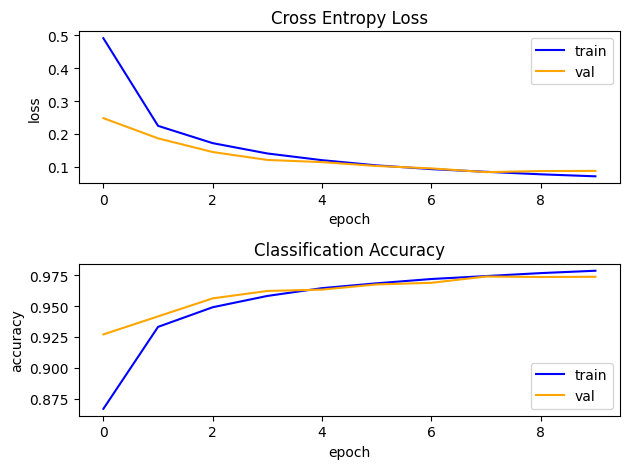

In [8]:
#plot loss
fig = plt.figure()
plt.subplot(2, 1, 1)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend(('train','val'))
plt.xlabel('epoch')
plt.ylabel('loss')

# plot accuracy
plt.subplot(2, 1, 2)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.legend(('train','val'))
plt.xlabel('epoch')
plt.ylabel('accuracy')
fig.tight_layout()
plt.show()

### Question 1 (5 points):

What do you observe in the above plots? What do you think might be the reason?

#### Your Answer

At around epoch 4, the accuracy of the model on train data starts to be more than the acccuracy of the validation data, the same thing happens to loss, the loss of the train dataset keep decreasing while the validation dataset stop decreasing and has some minor fluctuation. I think it is the hyperparameter tuning starts to overfit the training dataset after epoch 4

## (2) Vary learning rates (5 points)

Recall from lecture that we update the weights of the neural network by first calculate the gradients with backpropagation from the loss $L$, then update the weights by $$ w = w - \eta*\frac{\partial L}{\partial w}$$
Here, $\eta$ is the learning rate and decides the step size of updates. Previously we used $\eta=0.01$. We want to see the effect of learning rate on the training process, therefore we would like to try two other choices of $\eta$. (1) $\eta=1$ (2) $\eta=$1e-5 (0.00001)

In [9]:
#### TODO 1 STARTS ###
model_eta_large = define_model(1)
history_eta_large = model_eta_large.fit(trainX, trainY, batch_size=32, epochs=10, validation_data=(testX, testY))
#### TODO 1 ENDS ###

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3107 - accuracy: 0.1089 - val_loss: 2.3035 - val_accuracy: 0.1135
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3084 - accuracy: 0.1046 - val_loss: 2.3087 - val_accuracy: 0.1028
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3087 - accuracy: 0.1044 - val_loss: 2.3036 - val_accuracy: 0.1032
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3083 - accuracy: 0.1035 - val_loss: 2.3150 - val_accuracy: 0.1010
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3089 - accuracy: 0.1023 - val_loss: 2.3089 - val_accuracy: 0.1135
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3086 - accuracy: 0.1031 - val_loss: 2.3076 - val_accuracy: 0.1009
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3093 - accuracy: 0.1019 - val_loss: 2.3105 - val_accuracy:

In [10]:
#### TODO 2 STARTS ###
model_eta_small = define_model(1e-5)
history_eta_small = model_eta_small.fit(trainX, trainY, batch_size=32, epochs=10, validation_data=(testX, testY))
#### TODO 2 ENDS ###

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2930 - accuracy: 0.1116 - val_loss: 2.2902 - val_accuracy: 0.1172
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2866 - accuracy: 0.1221 - val_loss: 2.2838 - val_accuracy: 0.1268
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2803 - accuracy: 0.1340 - val_loss: 2.2774 - val_accuracy: 0.1380
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2740 - accuracy: 0.1484 - val_loss: 2.2710 - val_accuracy: 0.1539
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2677 - accuracy: 0.1650 - val_loss: 2.2646 - val_accuracy: 0.1703
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2613 - accuracy: 0.1874 - val_loss: 2.2582 - val_accuracy: 0.1970
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2549 - accuracy: 0.2149 - val_loss: 2.2517 - val_accuracy:

We now compare the training accuracy of the two above models with the training accuracy of the model in part 1.

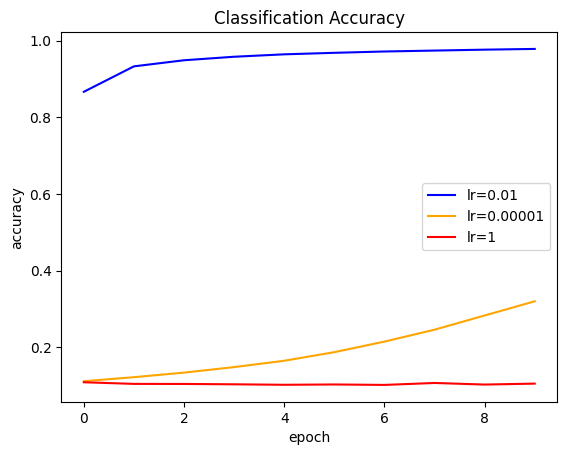

In [11]:
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue')
plt.plot(history_eta_small.history['accuracy'], color='orange')
plt.plot(history_eta_large.history['accuracy'], color='red')
plt.legend(('lr=0.01','lr=0.00001','lr=1'))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

### Question 2 (5 points):

What do you observe by looking at the training accuracies above? Does the two other models with small and large learning
rates seem to be learning? What do you think might be the reason? (optional) Can you find a better learning rate than the baseline?

#### Your Answer

The accuracy of the large learning rate doesn't really increase over time, while the accuracy of the small learning rate is increasing, but with a very slow rate of convergence. The main reason for the big learning rate could be it is too large so it keeps overshooting the fitting result, while the small learning rate will eventually gets to the accuracy of 0.1 learning rate but the step size is too small to converge fast. A way to find a better learning rate is to loop value from 1e-5 to 1e-1, and based on the plot we can decide which learning rate works the best. 

## (3) Adding momentum (5 points)

Till now we have tried various learning rates with SGD. There are various ways to make SGD behave more intelligently, 
one of which is momentum. Intuitively, when SGD tries to descend down a valley (an analogy for the case 
where the gradient of one dimension is larger than gradient of another dimension), SGD might bounce between the walls of the valley instead of descending along the valley. This makes SGD converge slower or even stuck. Momentum works by dampening the oscillations of SGD and encourages it to follow a smoother path. Formally, SGD with momentum update weights by the following way:

$$z^{k+1} = \beta z^{k} + \frac{\partial L}{\partial w^k}$$
$$w^{k+1} = w^{k} - \eta*z^{k+1}$$

Here $\beta$ is the momentum and is between 0 and 1. The official documentation of SGD details how to specify momentum (https://keras.io/api/optimizers/sgd/). If you want to learn more about momentum, this post might be helpful: https://distill.pub/2017/momentum/

Please define a model with learning rate 0.01 and momentum 0.9, then compare it to the baseline in part 1.

In [17]:
def define_model_with_momentum(learning_rate,momentum):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
    model.add(MaxPool2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    #### TODO 3 STARTS ###
    opt = tf.keras.optimizers.experimental.SGD(learning_rate=learning_rate,momentum=momentum)
    #### TODO 3 ENDS ###
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])  
    return model

In [20]:
#### TODO 4 STARTS ###
model_momentum = define_model_with_momentum(0.01,0.9)

history_momentum = model_momentum.fit(trainX, trainY, batch_size=32, epochs=10, validation_data=(testX, testY))
#### TODO 4 ENDS ###

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2369 - accuracy: 0.9277 - val_loss: 0.0884 - val_accuracy: 0.9706
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0783 - accuracy: 0.9763 - val_loss: 0.0610 - val_accuracy: 0.9798
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0484 - accuracy: 0.9854 - val_loss: 0.0497 - val_accuracy: 0.9835
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0353 - accuracy: 0.9892 - val_loss: 0.0552 - val_accuracy: 0.9830
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0265 - accuracy: 0.9919 - val_loss: 0.0461 - val_accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0201 - accuracy: 0.9938 - val_loss: 0.0433 - val_accuracy: 0.9861
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0148 - accuracy: 0.9960 - val_loss: 0.0418 - val_accuracy

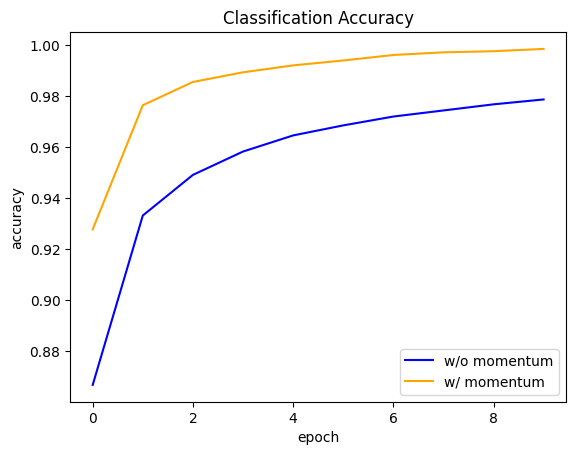

In [21]:
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue')
plt.plot(history_momentum.history['accuracy'], color='orange')
plt.legend(('w/o momentum','w/ momentum'))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

### Question 3 (5 points):

What do you observe in the plot? Does momentum improves training?

#### Your Answer

The model with momentem has a higher accuracy than the model without the momentem from the start to the end. Yes it does improve training.

## (4) Adding convolution layers (5 points)

To increase model capacity (the ability to fit more complex dataset), one way is to adding layers to the model. In part 
1, the model given to you has the following layers before the final 2 dense layers:
    
(1) 2D convolution with 32 filters of size 3-by-3, stride 1-by-1, 'valid' padding and relu activations

(2) 2-by-2 Max Pooling layer 

(2) Flatten layer

In the function below, please implement a model with the following layers (in this order):

(1) 2D convolution with 32 filters of size 3-by-3, stride 1-by-1, 'valid' padding and relu activations

(2) 2-by-2 Max Pooling layer 

(1) 2D convolution with 64 filters of size 3-by-3, stride 1-by-1, 'valid' padding and relu activations

(2) 2-by-2 Max Pooling layer 

(2) Flatten layer

In [22]:
def define_model_2_conv(learning_rate):
    model = Sequential()
    #### TODO 5 STARTS ###
    # adding layers here
    model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
    model.add(MaxPool2D((2, 2)))
    model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
    model.add(MaxPool2D((2, 2)))
    model.add(Flatten())
    
    #### TODO 5 ENDS ###
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=learning_rate)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])  
    return model

In [23]:
# define model and train
#### TODO 6 STARTS ###

model_2_layer =  define_model_2_conv(0.01)
history_2_layer = model_2_layer.fit(trainX, trainY, batch_size=32, epochs=10, validation_data=(testX, testY))

#### TODO 6 ENDS ###

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5312 - accuracy: 0.8515 - val_loss: 0.1629 - val_accuracy: 0.9540
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1466 - accuracy: 0.9559 - val_loss: 0.1125 - val_accuracy: 0.9648
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1000 - accuracy: 0.9697 - val_loss: 0.0841 - val_accuracy: 0.9747
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0789 - accuracy: 0.9754 - val_loss: 0.0638 - val_accuracy: 0.9807
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0656 - accuracy: 0.9803 - val_loss: 0.0535 - val_accuracy: 0.9824
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0576 - accuracy: 0.9821 - val_loss: 0.0600 - val_accuracy: 0.9798
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0506 - accuracy: 0.9848 - val_loss: 0.0576 - val_accuracy:

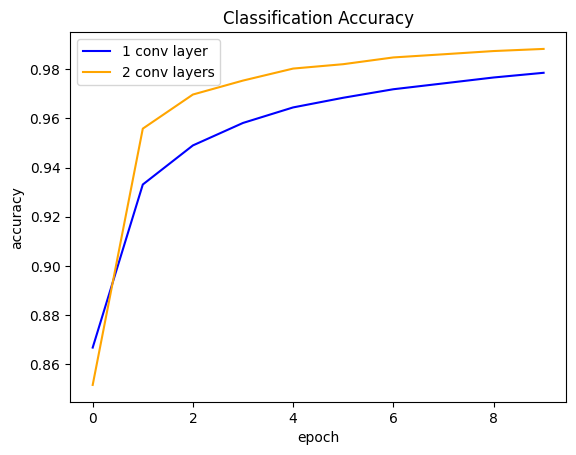

In [24]:
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue')
plt.plot(history_2_layer.history['accuracy'], color='orange')
plt.legend(('1 conv layer','2 conv layers'))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

### Question 4 (5 points):

What do you observe in the plot? Does adding a covolutional layer improves training set accuracy? What might be
the reason to the improvement if there are any?

#### Your Answer

The accuracy of the model with two cov layers at first in training has lower accuracy than the one cov layer model, but eventually it makes a sizable improvement in model accuracy. Two conv layers model may make the improvement by capturing more complex and abstract features and underlying patterns of the image hierarchically after the one conv layer model learns more basic feature, so it has a better accuracy.